In [1]:
!pip install -q -U watermark


In [2]:
!C:\Users\lucka\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip

O sistema nÆo pode encontrar o caminho especificado.


In [3]:
!pip install -q missingno

In [4]:
!pip install -q category_encoders

In [5]:
!pip install -q plotly

In [6]:
#Imports

#manipulação de dados
import pandas as pd
import numpy as np

#visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

#Estatistica
import scipy
from scipy.stats import normalteste
from scipy.stats import chi2_contingency

#Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce


#Ignore Warnings
import sys
import warnings
if not sys.warnoptions:
    warning.simplefilter('ignore')

ImportError: cannot import name 'normalteste' from 'scipy.stats' (C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\__init__.py)

In [ ]:
%reload_ext watermark
%watermark -a "Lucas Mendes" --iversions

## Carregando os dados

In [9]:
df = pd.read_csv(r'dataset/aug_train.csv')

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.head()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Análise exploratória

In [ ]:
#descreve os dados não numericos
df.describe(include = object)

In [ ]:
#descreve os dados numericos
df.describe().drop(columns = ['enrollee_id', 'target'])

- Em city_developmente_index(CDI), os valores médios são 0,82, mediana 0,90 e std 0,12(desvio padrão).Isso significa que a maioria dos candidatos é de cidades bem desenvolvidas.

- Em training_hours, os valores médios são 65,36, mediana 47 e max 336. Isso mostra que há candidatos com poucas horas de treino e outros levam muito tempo para fazer o treinamento.

### Visualizando as variáveis categoricas

In [10]:
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

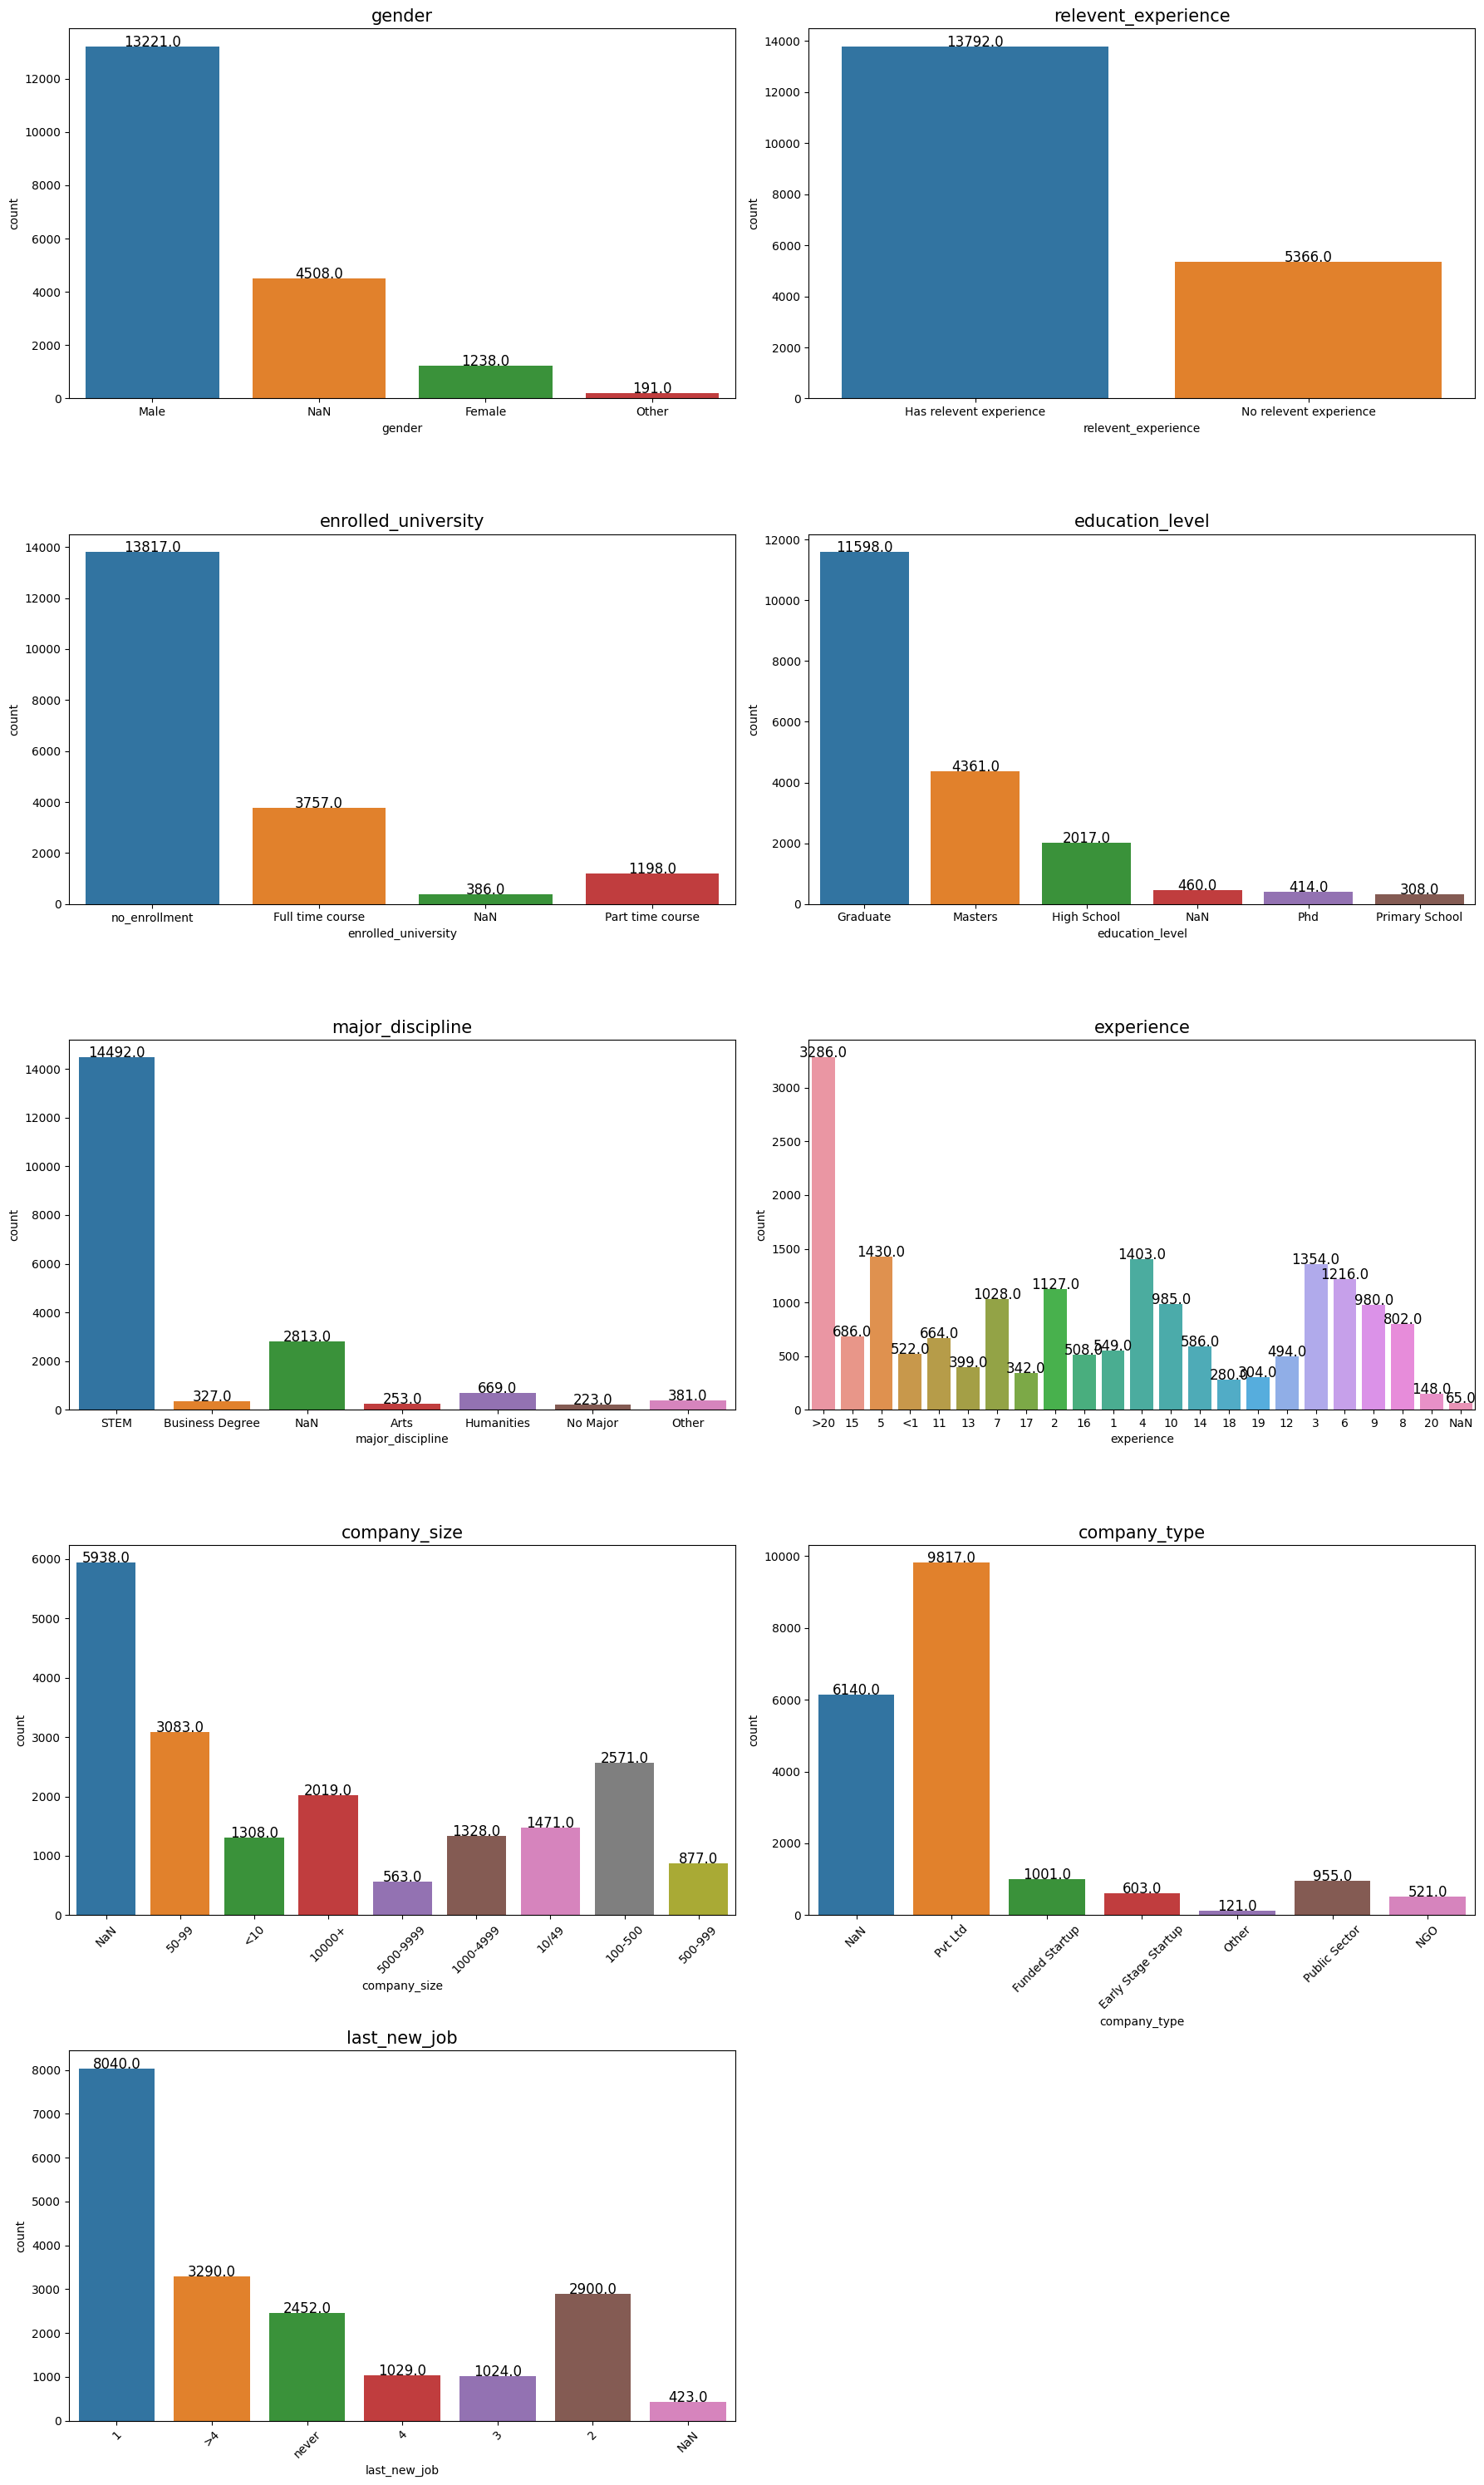

In [13]:
#Plot

#tamanho da figura
plt.figure(figsize = (18,30))

#lista de colunas
column_list = list(df.columns.values)[3:12]


#Contador
A = 0

#Loop 
for i in column_list:
    A += 1
    plt.subplot(5,2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}',(p.get_x()+ 0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
        if A >= 7:
            plt.xticks(rotation = 45)
            
#layout
plt.tight_layout(h_pad = 2)

### Verificando a distribuição das Variáveis Numéricas

In [14]:
#descrevendo os dados numéricos
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


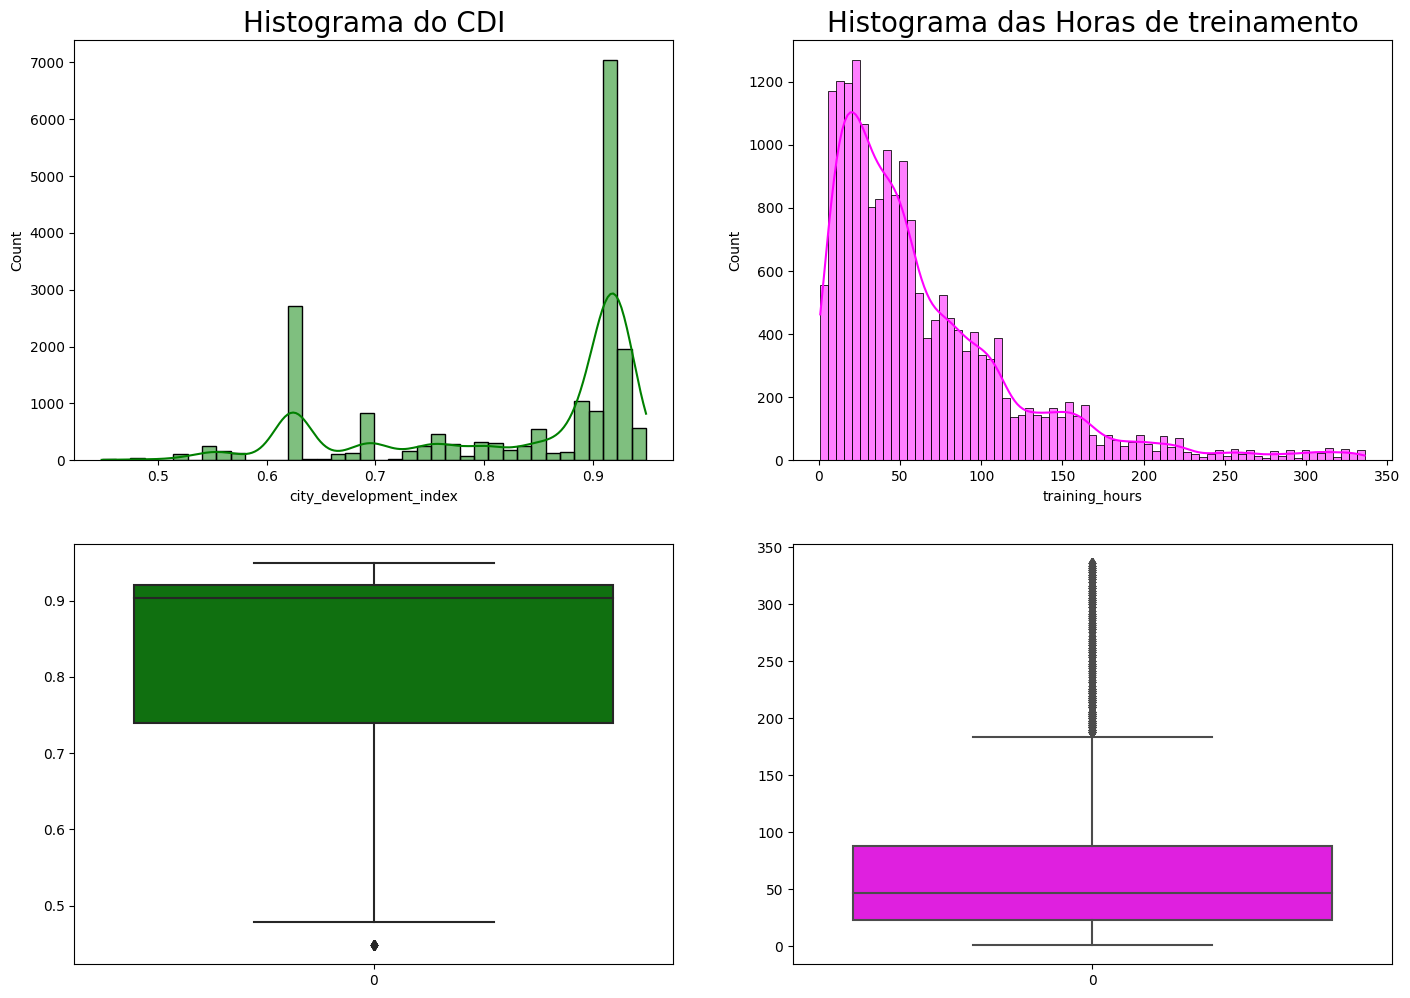

In [19]:
#Figura
plt.figure(figsize = (17,12))

#Subplots com histogramas
plt.subplot(221)
sns.color_palette('hls',8)
sns.histplot(df['city_development_index'], kde = True, color= 'green')
plt.title('Histograma do CDI', fontsize = 20)

plt.subplot(222)
sns.histplot(df['training_hours'], kde = True, color = 'magenta')
plt.title('Histograma das Horas de treinamento', fontsize = 20)


#subplot com boxplots

plt.subplot(223)
sns.boxplot(df['city_development_index'],color= 'green')

plt.subplot(224)
sns.boxplot(df['training_hours'], color = 'magenta')

plt.show()
